In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
train_path= "/content/drive/MyDrive/Colab Notebooks/Breast_Cancer/train"
test_path="/content/drive/MyDrive/Colab Notebooks/Breast_Cancer/validation"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 1411 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(patience=3,monitor='val_loss')
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=checkpoint
    )

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 6.1556 - accuracy: 0.5100 - auc: 0.5490 - precision: 0.5446 - recall: 0.5648
Epoch 1: val_accuracy improved from -inf to 0.63529, saving model to best_model.h5
50/50 [==============================] - 58s 816ms/step - loss: 6.1556 - accuracy: 0.5100 - auc: 0.5490 - precision: 0.5446 - recall: 0.5648 - val_loss: 0.6381 - val_accuracy: 0.6353 - val_auc: 0.7122 - val_precision: 0.6522 - val_recall: 0.6667
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.7135 - accuracy: 0.5600 - auc: 0.5467 - precision: 0.5281 - recall: 0.5054
Epoch 2: val_accuracy did not improve from 0.63529
50/50 [==============================] - 22s 441ms/step - loss: 0.7135 - accuracy: 0.5600 - auc: 0.5467 - precision: 0.5281 - recall: 0.5054 - val_loss: 0.6538 - val_accuracy: 0.6353 - val_auc: 0.7175 - val_precision: 0.6296 - val_recall: 0.7556
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.7165 - accurac

In [ ]:
model.evaluate(train_generator)

353/353 [==============================] - 53s 151ms/step - loss: 0.7172 - accuracy: 0.5734 - auc: 0.5950 - precision: 0.5708 - recall: 0.5692


[0.7172458171844482,
 0.5733522176742554,
 0.5950081944465637,
 0.5708154439926147,
 0.5691868662834167]

In [ ]:
model.evaluate(validation_generator)

22/22 [==============================] - 2s 78ms/step - loss: 0.7492 - accuracy: 0.5529 - auc: 0.5400 - precision: 0.5522 - recall: 0.8222


[0.7491974234580994,
 0.5529412031173706,
 0.5399999618530273,
 0.5522388219833374,
 0.8222222328186035]

1/1 [==============================] - 0s 31ms/step
[[0.52923596]]
THE UPLOADED IMAGE IS SUSPECTED AS: Cancer


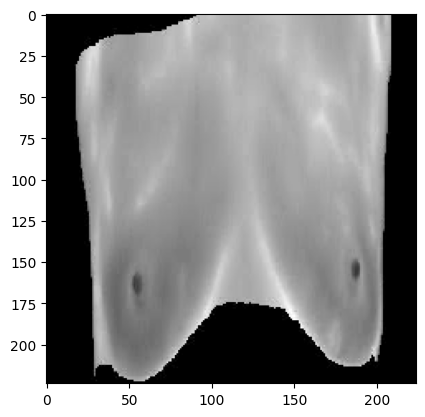

In [ ]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/Breast_Cancer/validation/Healthy/S_67.jpg",target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Healthy"
else:
      op="Cancer"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))